In [1]:
import glob
from IPython.display import YouTubeVideo
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
from tools.legacy import cutout


# Forest Explorers

If you have been at a secuoyas, or coniferous, forest, or at least have seen pictures like this

<img src="desihigh/images/TropicalForest.jpg" alt="Drawing" style="width: 800px;"/>

you have noticed they grow very close to each other and covers densily the space. They are really tall, and some thicker than others. Fascinating!

But in this notebook we'll explore other kind forests, the Lyman-$\alpha$. 

In 1970 the astronomer Roger Lynds noticed a large number of absorption lines in the spectrum of a very distant quasar, in particular in the region between the Lyman-$\alpha$ (Ly$\alpha$), at $121.6 {\rm nm} $, and the Lyman-$\beta$(Ly$\beta$), at $102.6 {\rm nm}$. The first two lines of Lyman's series, remember we talked about this in the DESI_es notebook? 

Some absorption lines were wider than others, and densely covering the region. It occurred to Lynds that the set of absorptions looked like a forest and thus named it. But what did he discover?

Quasars are galaxies hosting a supermassive black hole, which causes the surrounding gas to emit a large amount of radiation as a result of the accretion process towards the black hole.

Given their great luminosity, it is possible to observe them at really large distances. Although, in pictures they look like points, and sometimes we confuse them with stars.


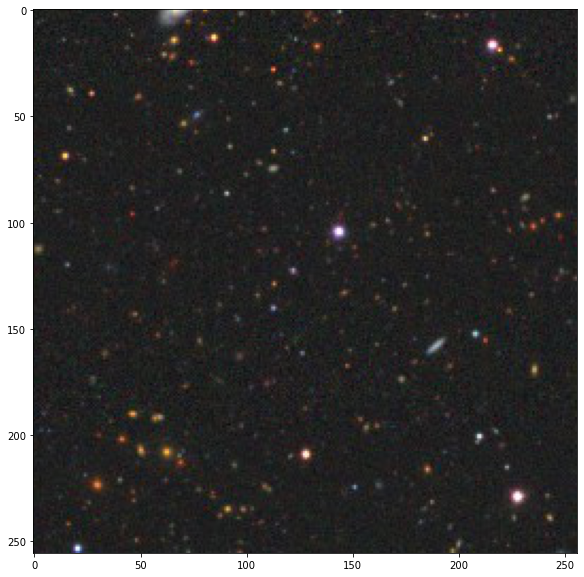

In [2]:
fig, axes  = plt.subplots(1, 1, figsize=(15., 10))
url = cutout(axes,201.75, 7.15 ,scale=0.5)

But the spectra of distant quasars are very disticntive. They have an strong emission Ly$\alpha$ line, and the most distant ones have much more absorptions that the closest ones. 

Some of such absorptions correspond to the same wavelength than the Ly$\alpha$ transition, but we observe it at a lower wavelenght, therfore at a lower redshift than the quasar. This means that light from the quasar as being redshifted it was also being absorbed in regions of hydrogen found along its trayectory towards the observer, or what we usually call the line of sight, as can be seen in this video. 

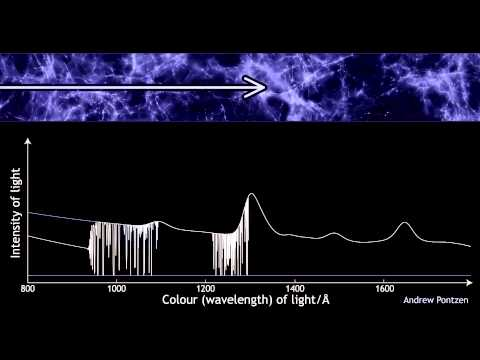

In [3]:
YouTubeVideo('6Bn7Ka0Tjjw')

¡Cool eh!

¿Have you heard about the $\pi$-day (3/14)? Well, we also have the Ly$\alpha$-day (12/16), someone on twitter celebrated it last year with this image...

![lemonalpha](https://pbs.twimg.com/media/EpYAU-2XYAE8SEQ?format=jpg&name=900x900 "lemon")

Lets get serious!

The absorptions detected in the spectra of distant quasars can be used as another tracer (besides the quasars and other galaxies) of the matter distribution in the Universe. The more hidrogen clouds there is the more absorptions we'll observe. As well, there is more hydrogen where there is more dark matter! So, detecting the Ly$\alpha$ absorptions allow us to infer how is the matter distributed in the Universe, and how it changes with time. 

DESI will observe more that 700,000 quasars with which we will be able to identify the Ly$\alpha$ forest for each of them and use them to measure with very high accuracy how fast the Universe has been expanding, and how the dark matter is distributed. 

¡Lets begin the exploration of DESI's forests!

We'll start by ploting the spectra we have at hand, from the DESI.ipynb notebook

In [4]:
#En el cuaderno https://github.com/michaelJwilson/desihigh/blob/main/Espanol/DESI_es.ipynb podemos ver como acceder a los datos especificos para cuasares.
qso_tile= 68002
redshifts   = Table()
spectra     = Table()

#Leemos el archivo de espectros y redshifts para cuasares, "zbest-"
redshifts      = Table.read('desihigh/student_andes/zbest-qso-68002-20200315.fits')
spectra     = Table.read('desihigh/student_andes/coadd-qso-68002-20200315.fits')

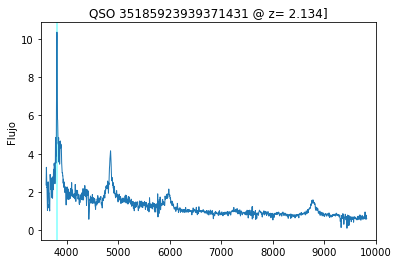

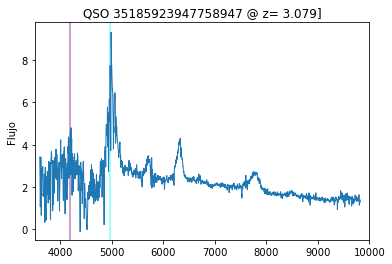

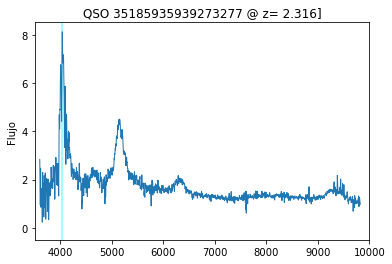

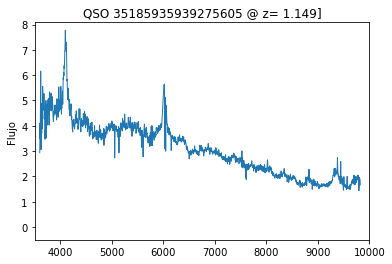

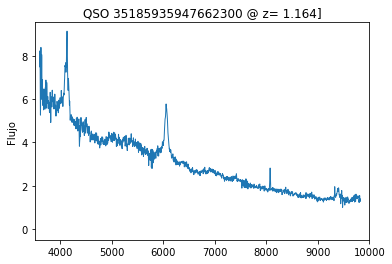

<Figure size 432x288 with 0 Axes>

In [5]:
#Definimos las longitudes de onda de lyman alpha y lyman beta en Angstroms
Lya=1215.67
Lyb=1026.0

#ahora graficamos solo los espectros de los cuasares con z>2.1, añadiendo una línea vertical para mostrar la linea de Lyman-alfa y otra para mostrar la linea de Lyman-beta.
for i, tid in enumerate(redshifts['TARGETID']):
    redshift = redshifts['Z'][i]
    plt.axvline((1. + redshift) * Lya, c='cyan', alpha=0.5)
    plt.axvline((1. + redshift) * Lyb, c='purple', alpha=0.5)
    plt.plot(spectra['WAVELENGTH'], spectra['TARGET{:d}'.format(tid)], lw=1)
    plt.title('QSO {} @ z= {:.3f}]'.format(tid, redshift))
    plt.xlim(3.5e3,1.e4)
    plt.ylim(bottom=-0.5)
    plt.ylabel('Flujo')
    plt.show()
    plt.clf()

It seems the Ly$\alpha$ emission line is only visible for the first three quasars. For the first and third quasars there seems to be a few aborptions present, but the Ly$\beta$ emission line is only visible for the second one. The three quasars are at redshift above 2.1, so that's the condition to observe the forest in DESI's quasars!

Lets look in more detail by selection only quasars with z>2.1, and plot them again highligting the region between the region between ly$\alpha$ and ly$\beta$ 

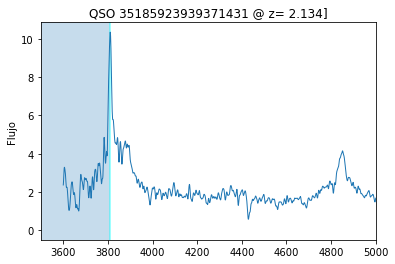

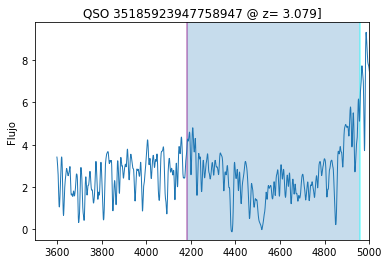

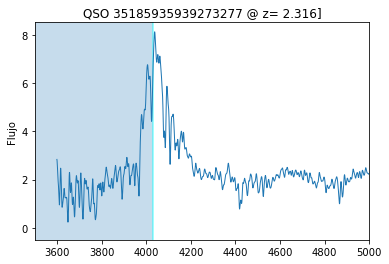

<Figure size 432x288 with 0 Axes>

In [6]:
#seleccionamos solo cuasares con z>2.1 que tenemos disponibles. 
islya=redshifts['Z']>2.1
lya_redshifts=redshifts[islya]

for i, tid in enumerate(lya_redshifts['TARGETID']):
    redshift = redshifts['Z'][i]

      # Añade una línea vertical para mostrar la linea de Lyman-alfa y otra para mostrar la linea de Lyman-beta.
    plt.axvline((1. + redshift) * Lya, c='cyan', alpha=0.5)
    plt.axvline((1. + redshift) * Lyb, c='purple', alpha=0.5)
    plt.axvspan((1. + redshift) * Lyb,(1. + redshift) * Lya,alpha=0.25)
    plt.plot(spectra['WAVELENGTH'], spectra['TARGET{:d}'.format(tid)], lw=1)
    plt.title('QSO {} @ z= {:.3f}]'.format(tid, redshift))
    # Define los límites de los ejes. 
    plt.xlim(3.5e3, 5.0e3)
    plt.ylim(bottom=-0.5)
    plt.ylabel('Flujo')
    plt.show()
    plt.clf()

Yes! definetely there are some absorptions, the shaded region is the Ly$\alpha$ forest.

You might be wondering, how do we know those are really absorptiond and not noise? 

Well, that is why we need high quality spectra. The longer our telescope capture light from this objects less noise we will have in the spectra, and the real absorptions will become clearer. This gif shows how the noise in our spectra reduces as we add observations of the same object.

![lyaforest](desihigh/images/lya_desihigh.gif "lyaforest")

Do you notice that huge absorption at ~4500 Angstrom? It is quite likely it corresponds to what is called a Damped Lyman alpha absorver (DLA), it is produced by high density hydrogen region. We could dedicate a full notebook to this kind of absorptions, but for the porpuse of using the Ly$\alpha$ forest in cosmology those thick lines are a bit difficult to treat, so we sometimes remove them from the forests. 

As the DLAs, there are other types of absorptions that do not really correspond to the Ly$\alpha$ ones we look for, so we have to spend some time understanding and identifying which absorptions are useful and which not... but, luckely, we don't do that by eye anymore! Can you think of a way to identiy DLAs that is quick and easy?

Well, while you design a method to help us out, lets keep it simple and extract the forest regardless the contaminants in there. For this we need to select out only the spectra that is in between the  Ly-$\alpha$ and Ly-$\beta$ region.

In [7]:
for i, tid in enumerate(lya_redshifts['TARGETID']):
    redshift = redshifts['Z'][i]
    tmp=spectra['TARGET{:d}'.format(tid)].copy()
    wave_cut=(spectra['WAVELENGTH']>(1. + redshift) * Lyb) & (spectra['WAVELENGTH']<(1. + redshift) * Lya)
    tmp[~wave_cut]=np.nan
    spectra['FOREST{:d}'.format(tid)]=tmp
   

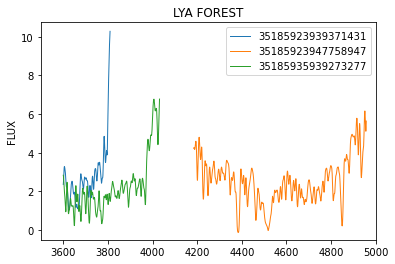

In [8]:
for i, tid in enumerate(lya_redshifts['TARGETID']):
    redshift = redshifts['Z'][i]
      # Añade una línea vertical para mostrar la linea de Lyman-alfa y otra para mostrar la linea de Lyman-beta.
    plt.plot(spectra['WAVELENGTH'], spectra['FOREST{:d}'.format(tid)], lw=1, label=tid)
    plt.title("LYA FOREST")
    # Define los límites de los ejes. 
    xmin,xmax=min(spectra[spectra['FOREST{:d}'.format(tid)]!=0]["WAVELENGTH"]),min(spectra[spectra['FOREST{:d}'.format(tid)]!=0]["WAVELENGTH"])
    
    plt.ylim(bottom=-0.5)
    plt.ylabel('FLUX')
    
plt.xlim(3500,5000)
plt.legend()

¡DONE! 

Once we have extracted the forests, we are left to use them to calculate how fast the unverse is expanding. We'll do that in another notebook, but you can help us by completing the following tasks beforehand:



# QUIZ:  ENCUENTRA AL IMPOSTOR

En DESI además de trabajar con datos directos del telescopio, a veces nos es útil trabajar con datos simulados, los cuales buscamos sean lo más realistas posibles. En la siguiente imagen te mostramos 4 imágenes de cuásares Ly$\alpha$ ¿podrías decir cual es el espectro simulado?
